# Estimating Uncertainty

We saw previously that estimates of the mean can vary from sample to sample. This uncertainty can be expressed as a confidence interval, conventionally set at 95% 

![estimation_uncertainty.png](images/estimation_uncertainty.png)

## Data preparation

We start by simulating a population of 1000 from a non-normal distribution to illustrate the Central Limit Theorem when inferring the population mean and the uncertainty of the estimate

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



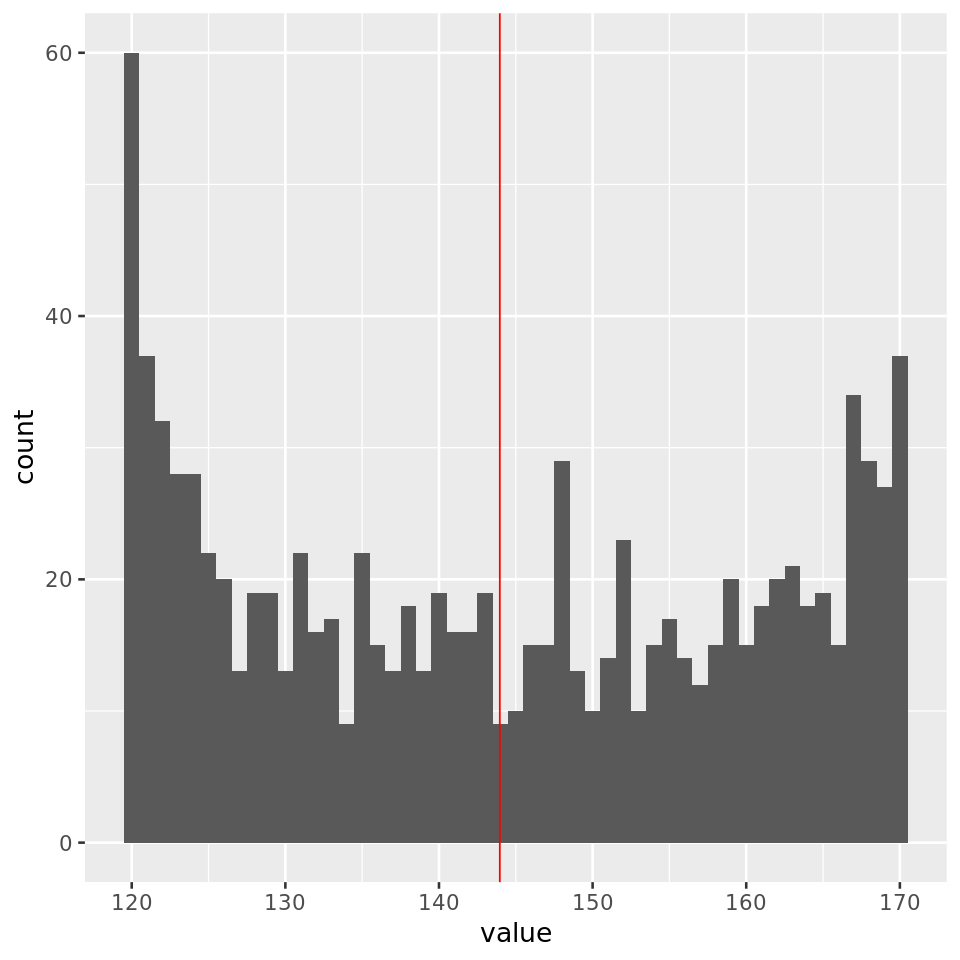

In [ ]:
library(tidyverse)

# set random seed for reproducibility
set.seed(123)

# generate non-normal population
pop <- rbeta(1000, 0.6,0.6)*50+120 # beta distribution

# set plot dimensions
options(repr.plot.width=8, repr.plot.height=8)

pop %>% 
tibble(value=.) %>% 
ggplot(aes(x=value)) + 
  geom_histogram(binwidth=1) +
  geom_vline(aes(xintercept=mean(value)), color="red") +
  theme_grey(base_size=16)

In [ ]:
tibble(stat=c("Population mean",
              "Population variance"),
       value=c(mean(pop), 
               sum((pop-mean(pop))^2)/length(pop)))

stat,value
<chr>,<dbl>
Population mean,143.9593
Population variance,278.0270


---
## How does the estimate of the mean vary if we can sample the population repeatedly?

To get an idea of the uncertainty behind our estimate of the mean, we can take repeated samples from the population `without replacement` and see the distribution of our estimates

![sampling_population.jpg](images/sampling_population.jpg)

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4784504/

We define a function `resample` to take multiple samples of a certain size from the population and return the means of the samples

```
resample(replicate = number of repetitions,
         sample_size = size of sample,
         input_pop = input population to sample)
```

In [ ]:
resample <- function(replicate, sample_size, input_pop) {
    
    sample_mean = vector()

    for (i in 1:replicate) {

        sample_pop <- sample(input_pop, sample_size, replace = FALSE)
        sample_mean <- c(sample_mean, mean(sample_pop))  
    
        }
    return(sample_mean)
}

Let us calculate the mean of a random sample of 10 and repeat it 10,000 times

In [ ]:
# take a sample of 10 and repeat 10,000 times
sample_mean <- resample(replicate = 10000, 
                        sample_size = 10, 
                        input_pop = pop)

head(sample_mean)

[1] 152.9461 137.8296 153.2764 138.4548 147.1906 134.4661

We can plot the distribution of the sample means and include the 2.5% and 97.5% percentiles using the `quantile` function. These percentiles represent the lower and upper limits of sample means within a 95% interval (97.5 - 2.5 = 95)

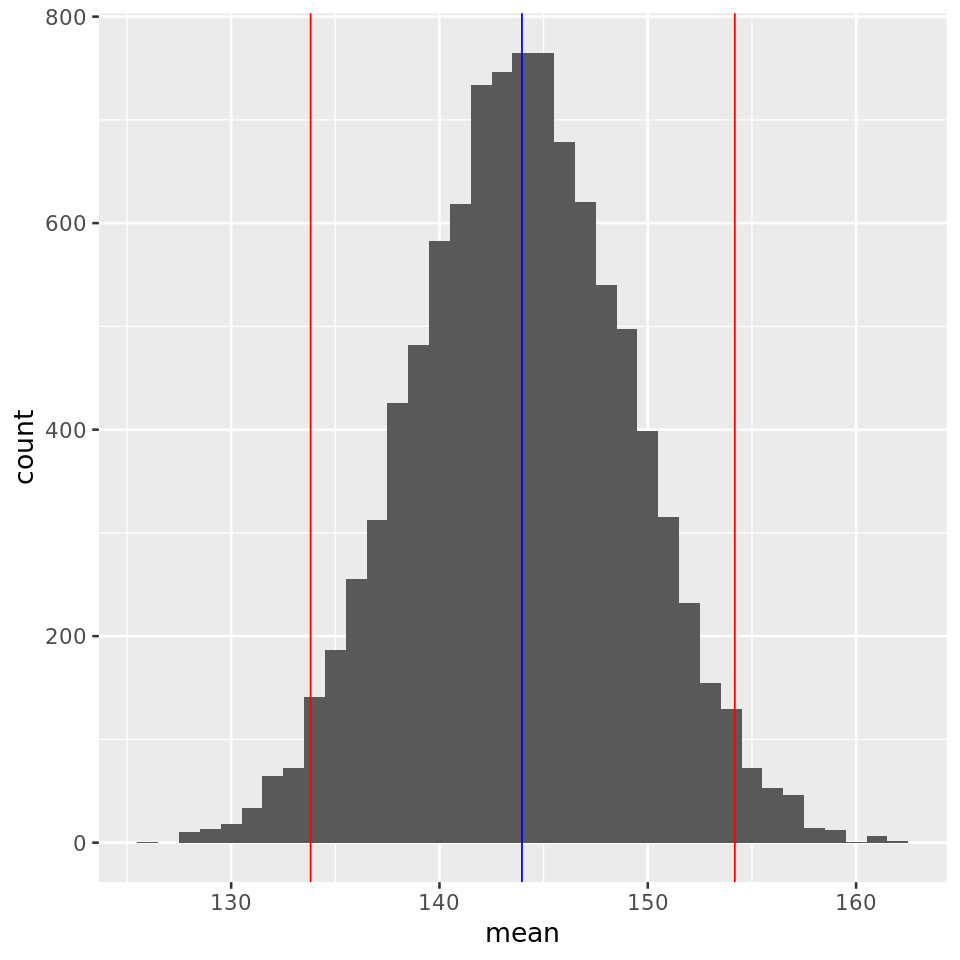

In [ ]:
# set plot dimensions
options(repr.plot.width=8, repr.plot.height=8)

sample_mean %>% 
tibble(mean=.) %>% # convert to tibble for ggplot
ggplot(aes(x=mean)) +
  geom_histogram(binwidth=1) +
  geom_vline(xintercept = (quantile(sample_mean, 0.025)), color="red") +
  geom_vline(xintercept = (quantile(sample_mean, 0.975)), color="red") +
  geom_vline(xintercept = mean(pop), color="blue") +
  theme_gray(base_size=16)

We can see that the distribution of the sample means is indeed normally distributed, in accordance to the Central Limit Theorem. We can obtain the 2.5% and 97.5% percentile values which represent the limits of the 95% confidence interval (CI)

In [ ]:
tibble(stat=c("Population mean",
              "Sample mean",
              "2.5% percentile",
              "97.5% percentile"),
       value=c(mean(pop), 
               mean(sample_mean),
               quantile(sample_mean,0.025), 
               quantile(sample_mean,0.975)))

stat,value
<chr>,<dbl>
Population mean,143.9593
Sample mean,143.8976
2.5% percentile,133.8147
97.5% percentile,154.1778


**What do the confidence intervals mean?**

If we were to sample the population repeatedly
- 95% of the time, we would obtain sample mean values between the 2.5% and 97.5% percentile values
- 95% of the time, the population mean is contained within these intervals

---
## How can we get an estimate of a confidence interval if we can only have 1 sample?

In most cases, we do not have the luxury of taking multiple samples from the population. It turns out that it is possible to get an estimate of the confidence interval from 1 sample through a procedure called bootstrapping. The term comes from the phrase "pulling up by one's own bootstraps", where something is achieved without external input.

In this procedure, the 1 sample is resampled repeatedly `with replacement` and the distribution is used to estimate the uncertainty.

![sampling_bootstrap.jpg](images/sampling_bootstrap.jpg)

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4784504/

We start by taking a single sample of 10 (without replacement) that we will use to obtain the 95% confidence interval of the mean estimate

In [ ]:
# For reproducibility
set.seed(101)

# Take sample of 100
sample_pop <- sample(pop, size = 10, replace = FALSE)

head(sample_pop)

[1] 169.9916 125.2050 148.2205 128.0950 168.0461 163.4876

From this one initial sample of 10 measurements, we take multiple samples **with replacement** for 1000 times and calculate the sample mean for each replicate

In [ ]:
boot_mean = vector()

for (i in 1:1000) {
    
  boot_pop <- sample(sample_pop, replace = TRUE) # we replace the samples
  boot_mean <- c(boot_mean, mean(boot_pop))
    
}

head(boot_mean)

[1] 148.3484 150.4104 143.9795 140.8260 146.7043 139.1476

We can plot the distribution of sample means and include the 2.5% and 97.5% percentiles

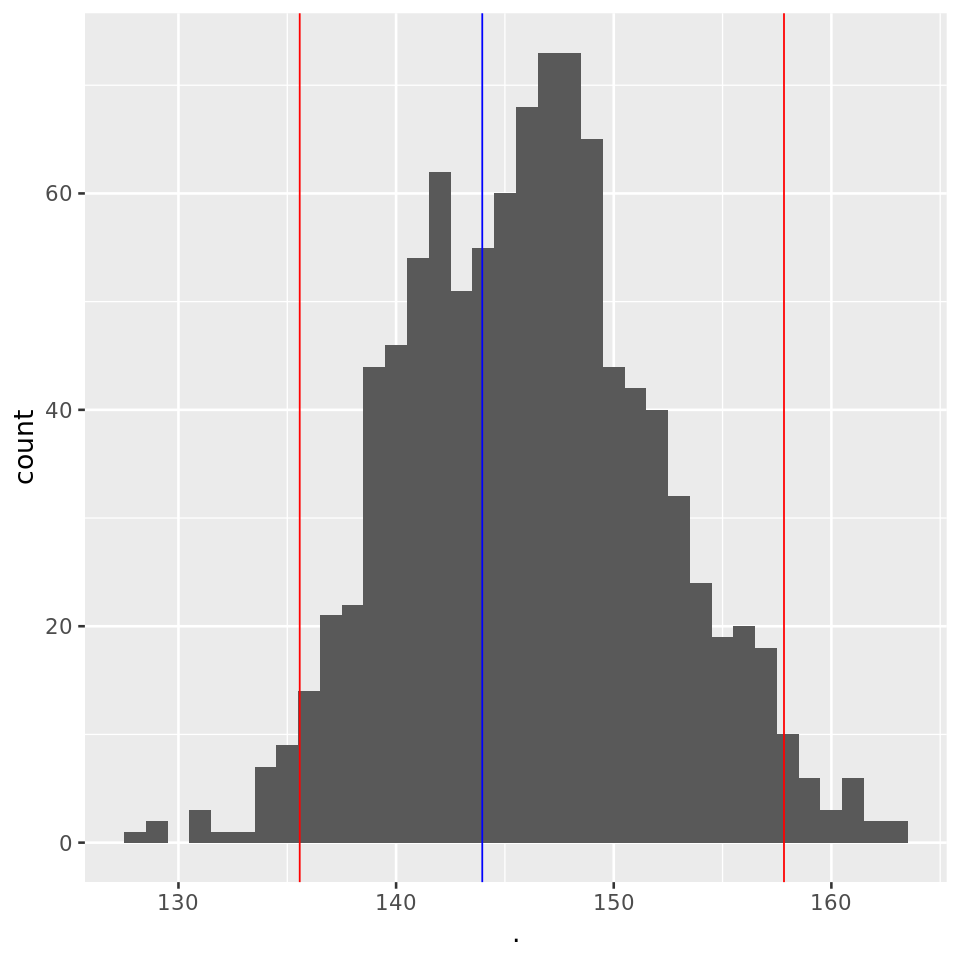

In [ ]:
# set plot dimensions
options(repr.plot.width=8, repr.plot.height=8)

boot_mean %>% 
tibble %>%
ggplot(aes(x=.)) +
 geom_histogram(binwidth=1) +
 geom_vline(xintercept = (quantile(boot_mean, 0.025)), color="red") +
 geom_vline(xintercept = (quantile(boot_mean, 0.975)), color="red") +
 geom_vline(xintercept = mean(pop), color="blue") +
 theme_grey(base_size=16)

With bootstrapping, we see that the distribution is approximately normal, and we can obtain the 2.5% and 97.5% percentile values which represent the limits of the 95% confidence interval (CI)

In [ ]:
tibble(stat=c("Population mean",
              "Sample mean",
              "2.5% percentile",
              "97.5% percentile"),
       value=c(mean(pop), 
               mean(boot_mean),
               quantile(boot_mean,0.025), 
               quantile(boot_mean,0.975)))

stat,value
<chr>,<dbl>
Population mean,143.9593
Sample mean,146.1919
2.5% percentile,135.5714
97.5% percentile,157.8232


**What do the confidence intervals mean?**

If we were to sample the population repeatedly
- 95% of the time, we would obtain sample mean values between the 2.5% and 97.5% percentile values
- 95% of the time, the population mean is contained within these intervals

Note that the bootstrap procedure is very dependent on the **initial** sample taken
- If the sample is representative, the bootstrap estimate is good and makes no assumptions except it should be a random sample that is independent
- If the sample is biased, the estimate can be very inaccurate

---
## Analytical approach using theoretical distribution

Given the **Central Limit Theorem (CLT)**, we assume that the distribution of means will be **approximately normal with a large sample size** and we can estimate the confidence interval without having to perform a resampling procedure such as bootstrapping

To do this, we can use the analytical approach to estimate the 2.5% and 97.5% from a theoretical normal distribution

- To allow comparison of normal distributions from different sources of data, the normal distribution can be **standardized** to a mean of 0 and a standard deviation of 1

![normal.png](images/normal.png)

We can transform the data using **Z-scores**, which approximates a standard normal distribution

$$Z=\frac{\bar{X}-\mu}{\sigma / \sqrt{n}} \sim N(0,1)$$

We can use the standard normal distribution to determine which Z-scores correspond to the 95% interval (0.025 and 0.975 quantiles)

![normal_ci.png](images/normal_ci.png)

The Z-scores corresponding to the upper and lower limits of 95% interval in the standard normal distribution can be used to calculate the upper and lower limits of the 95% confidence interval of the mean

$$-Z_\mathit{lower}\leq \frac{\bar{X}-\mu}{\sigma / \sqrt{n}} \leq +Z_\mathit{upper}$$
$$-Z_\mathit{lower}\left(\frac{\sigma}{\sqrt{n}}\right) \leq \bar{X}-\mu \leq+Z_\mathit{upper}\left(\frac{\sigma}{\sqrt{n}}\right)$$
$$-\bar{X}-Z_\mathit{lower}\left(\frac{\sigma}{\sqrt{n}}\right) \leq-\mu \leq-\bar{X}+Z_\mathit{upper}\left(\frac{\sigma}{\sqrt{n}}\right)$$
$$\bar{X}-Z_\mathit{lower}\left(\frac{\sigma}{\sqrt{n}}\right) \leq \mu \leq \bar{X}+Z_\mathit{upper}\left(\frac{\sigma}{\sqrt{n}}\right)$$


**Taking a sample from the population**

We take a sample (n=100) from the population and get an estimate of the uncertainty of the population mean

In [ ]:
n <- 100

# take sample (100) from population
sample_pop <- sample(pop, n, replace = FALSE)

head(sample_pop)

[1] 125.3022 127.5742 168.6228 147.5738 136.1200 155.8733

**Calculating the 95% confidence interval**

First, we find the Z-score at the 2.5% and 97.5% limits using the ```qnorm``` function

In [ ]:
z_lower <- qnorm(0.025)
z_upper <- qnorm(0.975)

z_lower
z_upper

[1] -1.959964

[1] 1.959964

Next, we multiply it by the **standard error** $\sigma / \sqrt{n}$ to obtain the upper and lower error bounds of the 95% confidence interval
- Note that the standard deviation of the population is _not_ known, so we are using the standard deviation of the sample population (n=100) as an estimate

In [ ]:
std_err <- sd(sample_pop)/sqrt(n)

error_lower <- z_lower * std_err
error_upper <- z_upper * std_err

error_lower
error_upper

[1] -3.190485

[1] 3.190485

Finally, we add them to the observed mean to give us the upper and lower limits of the 95% confidence interval

In [ ]:
mean(sample_pop) + error_lower
mean(sample_pop) + error_upper

[1] 139.4597

[1] 145.8407

**How good are the 95% CI estimates using the theoretical normal distribution?**


To see how good the 95% CI estimates are, we first define a function `CI_norm` to calculate the confidence interval using the theoretical normal distribution for one sample

```
CI_norm(input_pop = input population to sample
        sample_size = size of sample)
```

In [ ]:
CI_norm <- function(input_pop, sample_size) {
    
    sample_pop <- sample(input_pop, sample_size, replace = FALSE)
    error <- qnorm(0.975) * (sd(sample_pop)/sqrt(sample_size)) #  the error for 0.025 and 0.975 is the same

    tibble(lower=mean(sample_pop) - error, 
           upper=mean(sample_pop) + error) %>%
    return

}

For example, we can calculate the 95% CI for a sample of 100 from the population

In [ ]:
# 95% CI for sample size of 100

CI_norm(input_pop = pop,
        sample_size = 100)

lower,upper
<dbl>,<dbl>
141.7727,147.8022


We can now use this `CI_norm` function and repeat CI estimates for the sample population (n=100) for 100 times and check how often the population mean is included within the limits

In [ ]:
# For reproducibility
set.seed(747)

data_norm <- replicate(100, CI_norm(pop, sample_size=100), simplify=FALSE) %>% 
             bind_rows %>%
             mutate(replicate=1:100,
                    included = ifelse(mean(pop)<=upper & mean(pop)>=lower,
                                      "yes",
                                      "no"))

head(data_norm)

lower,upper,replicate,included
<dbl>,<dbl>,<int>,<chr>
138.9957,145.1074,1,yes
143.4989,149.9997,2,yes
142.0400,148.7452,3,yes
142.1885,148.9183,4,yes
144.8537,151.0413,5,no
141.8196,148.0449,6,yes


We can visualize the estimates in a plot and calculate the number of times each CI includes the true population mean 

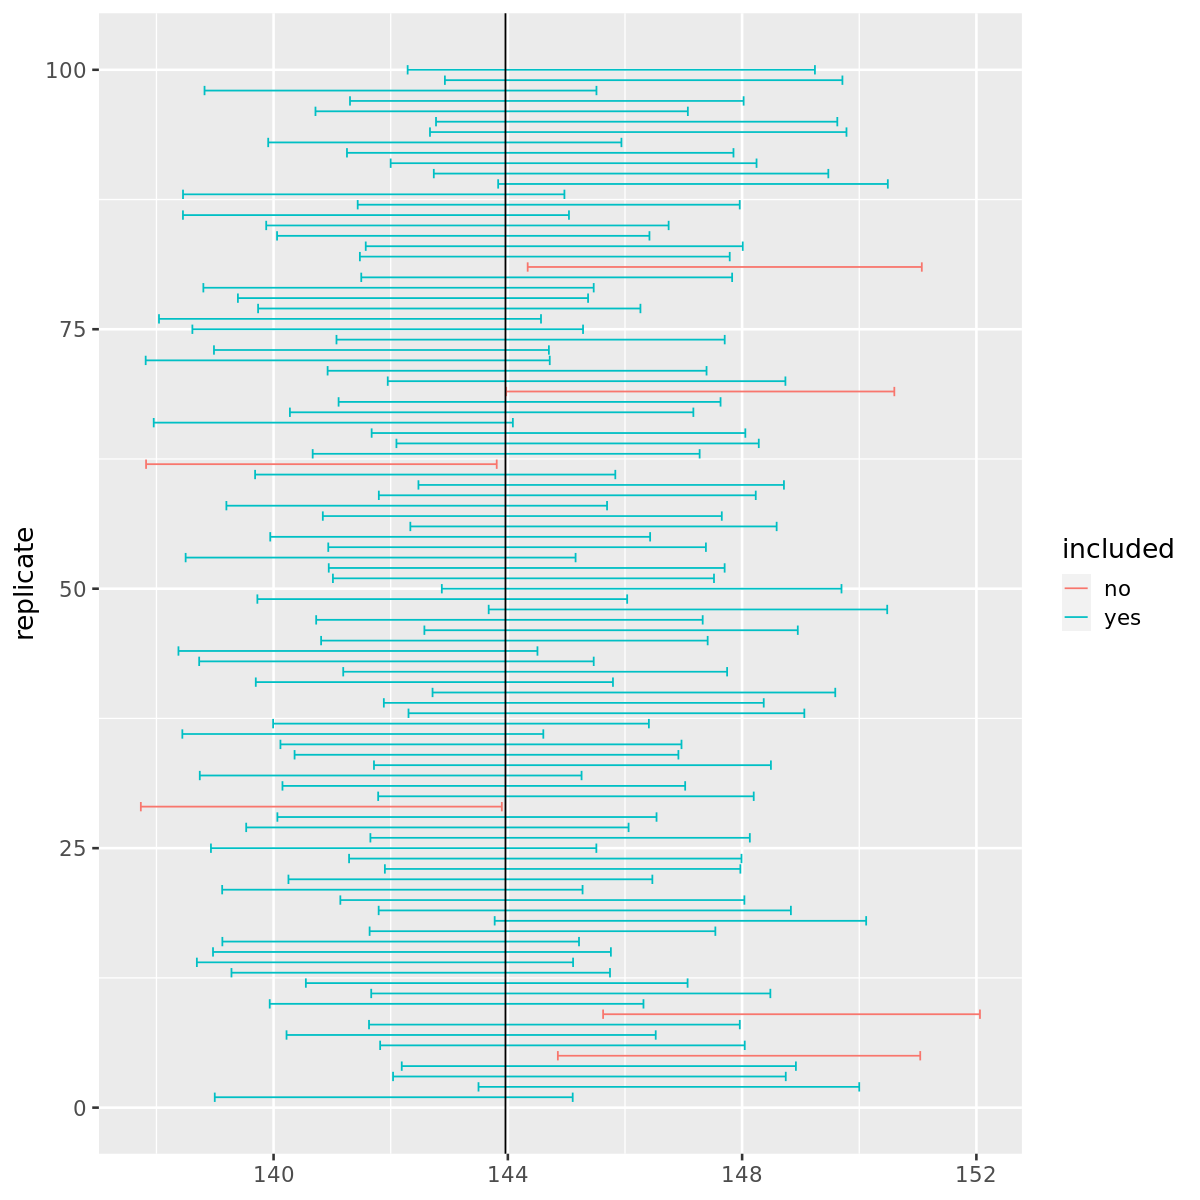

In [ ]:
# adjust size of the image output
options(repr.plot.width=10, repr.plot.height=10)

data_norm %>% group_by(replicate) %>%
              ggplot(aes(x=replicate, color=included)) + 
              geom_errorbar(aes(ymin=lower, ymax=upper)) +
              geom_hline(yintercept=mean(pop)) +
              coord_flip() +
              theme_grey(base_size=16)

In [ ]:
data_norm %>% count(included)

included,n
<chr>,<int>
no,6
yes,94


We can see that the 95% CI estimate from one sample is consistent when we repeat the estimates multiple times 
- ~95% of the time, the true population mean is contained with the CI intervals

**What if we reduce the sample size (n=5)?**

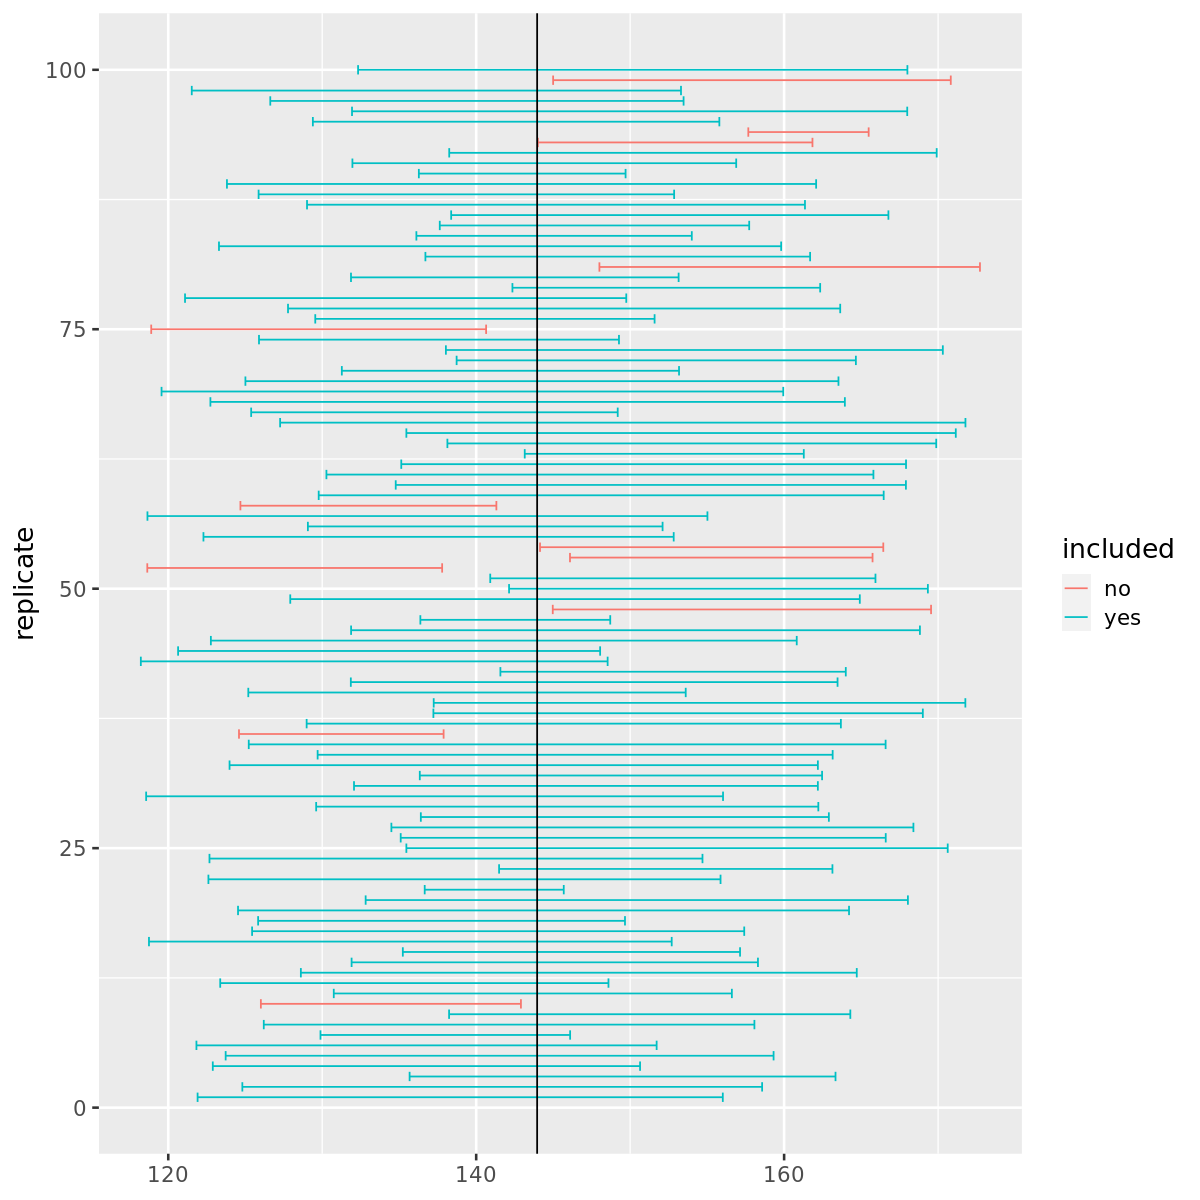

In [ ]:
# For reproducibility
set.seed(747)

# generate CI replicates for a smaller sample size (n=5)
data_norm <- replicate(100, CI_norm(pop, sample_size=5), simplify=FALSE) %>% 
             bind_rows %>%
             mutate(replicate=1:100,
                    included = ifelse(mean(pop)<=upper & mean(pop)>=lower,
                                      "yes", "no"))
# adjust size of the image output
options(repr.plot.width=10, repr.plot.height=10)

data_norm %>% group_by(replicate) %>%
              ggplot(aes(x=replicate, color=included)) + 
                geom_errorbar(aes(ymin=lower, ymax=upper)) +
                geom_hline(yintercept=mean(pop)) +
                coord_flip() +
                theme_grey(base_size=16)

In [ ]:
data_norm %>% count(included)

included,n
<chr>,<int>
no,12
yes,88


Interestingly, the proportion of CI estimates that include the population mean is now lower than 95%, using the theoretical normal distribution. 
- This indicates that the normal distribution may not be a good theoretical distribution to use when the sample size is small
- The 95% CI was based on the standard deviation of **sample** instead of the population (which is unknown when we just have the sample)

---
## Using a t-distribution to account for smaller sample sizes

In the normal distribution, the data is standardized using Z-scores

$$Z=\frac{\bar{X}-\mu}{\sigma / \sqrt{n}} \sim N(0,1)$$

In the denominator, the $\sigma$ is the **population variance** which is **unknown** most of the time. When the population variance is unknown, we will have to rely on the **sample standard deviation** $s$, which depends on the **sample size**

$$s=\sqrt{\frac{\sum(x-\bar{x})^{2}}{n-1}}$$


To account for sample size, we calculate the **t-score**

$$t=\frac{\bar{x}-\mu}{s / \sqrt{n}} \sim t(\mathit{df} = n-1)$$

- It uses the **sample standard deviation** $s$ instead of the population standard deviation $\sigma$ (which is not known)
- It standardizes the data to the **Student's t-distribution**, which depends on a parameter called the **degrees of freedom** ($\mathit{df}=n-1$), where $n$ is the number of samples. 

![t-dist.png](images/t-dist.png)

The degrees of freedom $\mathit{df}$ depends on the sample size and determines the shape of the t-distribution
- As the sample size and degrees of freedom decreases, the spread of uncertainty increases as seen in the heavier tails
- As the sample size and degrees of freedom increases, it approximates the normal distribution

The confidence interval is calculated in a similar way, with the following differences 
- The **t-scores** for the upper and lower limits of the 95% interval also depend in the the **degrees of freedom** $t(\mathit{df})$
- We use the standard deviation of the _sample_ $s$ which is known, instead of using the standard deviation of the population $\sigma$

$$-t(\mathit{df})_\mathit{lower}\leq \frac{\bar{x}-\mu}{ s / \sqrt{n}} \leq +t(\mathit{df})_\mathit{upper}$$
$$-t(\mathit{df})_\mathit{lower}\left(\frac{s}{\sqrt{n}}\right) \leq \bar{x}-\mu \leq+t(\mathit{df})_\mathit{upper}\left(\frac{s}{\sqrt{n}}\right)$$
$$-\bar{x}-t(\mathit{df})_\mathit{lower}\left(\frac{s}{\sqrt{n}}\right) \leq-\mu \leq-\bar{x}+t(\mathit{df})_\mathit{upper}\left(\frac{s}{\sqrt{n}}\right)$$
$$\bar{x}-t(\mathit{df})_\mathit{lower}\left(\frac{s}{\sqrt{n}}\right) \leq \mu \quad \leq \bar{x}+t(\mathit{df})_\mathit{upper}\left(\frac{s}{\sqrt{n}}\right)$$

**Taking a sample from the population**

We take a sample (n=10) from the population and get an estimate of the uncertainty

In [ ]:
n <- 10

# take sample (n=10) from population
sample_pop <- sample(pop, n, replace = FALSE)

head(sample_pop)

[1] 136.1781 137.6107 131.0612 127.5742 165.0496 167.2076

**Calculating the 95% confidence interval**

We can determine the t-score using the ```qt``` function that gives the t-score for the quantile (0.025 or 0.975) and the degree of freedom $\mathit{df}=n-1$


For example, we can determine the t-score of the 2.5% and 97.5% percentiles for a sample size of 10, where the degree of freedom = 10-1 = 9

```
qt(quantile, df = degrees of freedom)
```

In [ ]:
t_lower <- qt(0.025, df=n-1)
t_upper <- qt(0.975, df=n-1)

t_lower
t_upper

[1] -2.262157

[1] 2.262157

Next, we multiply it by the standard error $s/\sqrt{n}$ to obtain the upper and lower error bounds of the 95% confidence interval

In [ ]:
std_err <- sd(sample_pop)/sqrt(n)

error_lower <- z_lower * std_err
error_upper <- z_upper * std_err

error_lower
error_upper

[1] -10.64914

[1] 10.64914

Finally, we add them to the observed mean to get the upper and lower limits of the 95% confidence interval

In [ ]:
mean(sample_pop) + error_lower
mean(sample_pop) + error_upper

[1] 135.5222

[1] 156.8205

**How good are the 95% CI estimates using the  t-distribution?**

To see how good the 95% CI estimates are, we first define a function `CI_t` to calculate the confidence interval using the theoretical t-distribution for one sample

```
CI_t(input_pop = input population to sample,
     sample_size = size of sample)
```

In [ ]:
# define function to calculate the confidence interval from the t-distribution

CI_t <- function(input_pop, sample_size) {
    
    sample_pop <- sample(input_pop, sample_size, replace = FALSE)
    error <- qt(0.975,df=sample_size-1) * sd(sample_pop)/sqrt(sample_size) # the error is the same for 0.025 or 0.975
    
    tibble(n=sample_size, 
           lower=mean(sample_pop) - error, 
           upper=mean(sample_pop) + error 
           ) %>%
    return

}

For example, we can use this function to calculate the 95% CI for a random sample (n=10)

In [ ]:
CI_t(input_pop = pop, sample_size = 10)

n,lower,upper
<dbl>,<dbl>,<dbl>
10,138.5202,158.7039


We can now use this `CI_t` function and repeat CI estimates for the sample population (n=5) for 100 times and check how often the population mean is included within the limits

We visualize the estimates in a plot and calculate the number of times each CI includes the true population mean 

**Student's t-distribution CI**

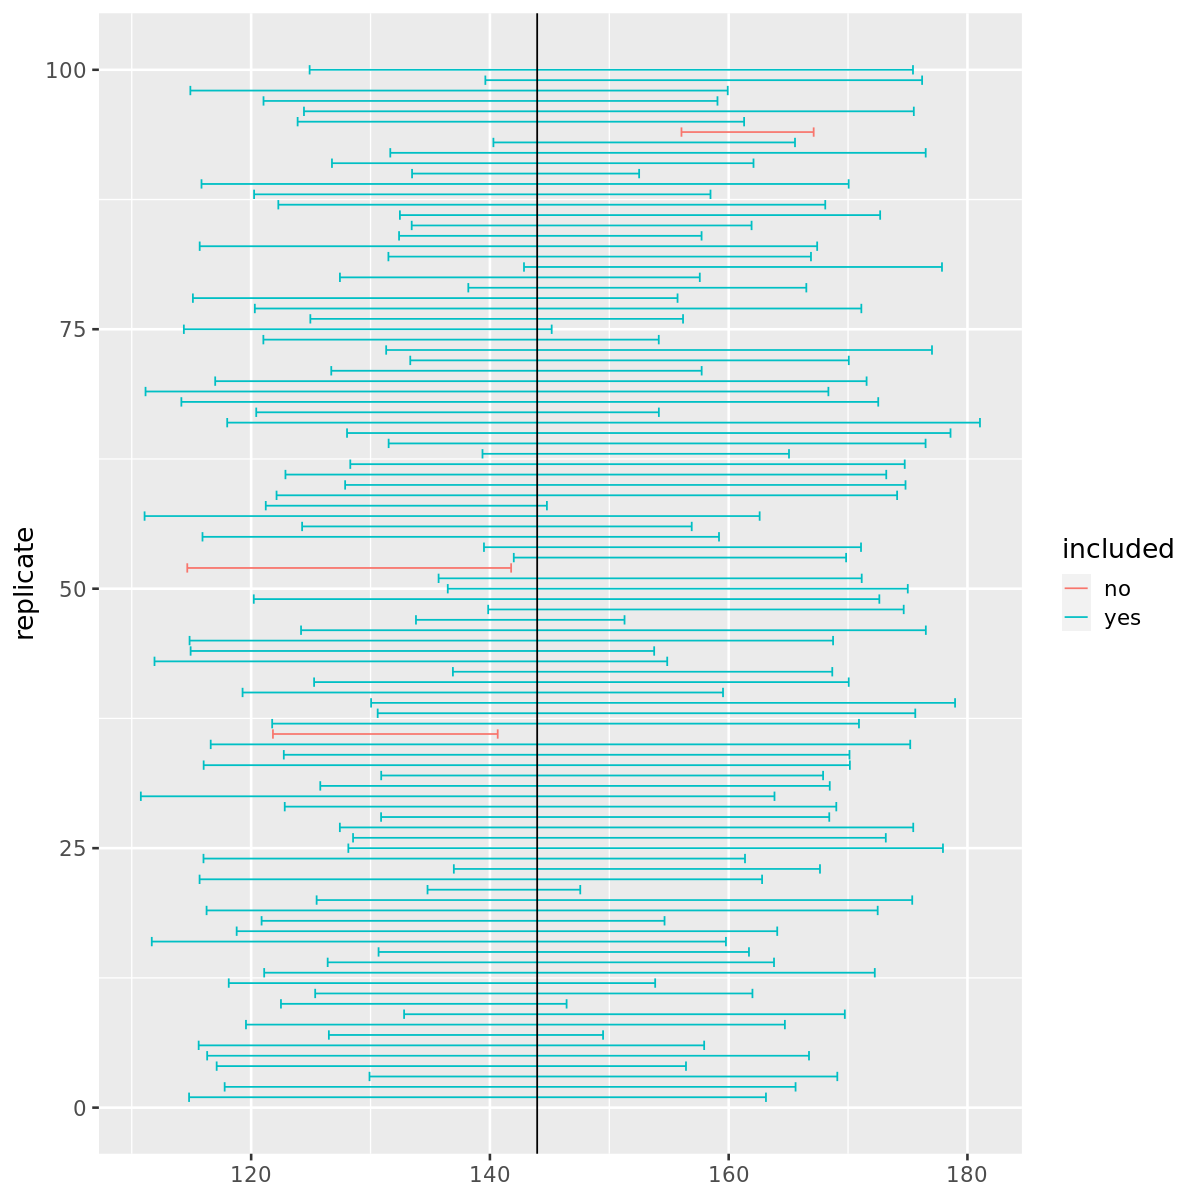

In [ ]:
# For reproducibility
set.seed(747)

# generate 100 replicates of the confidence interval
data_t <- replicate(100, CI_t(pop, sample_size=5), simplify=FALSE) %>% 
          bind_rows %>%
          mutate(replicate=1:100,
                 included = ifelse(mean(pop)<=upper & mean(pop)>=lower,
                                   "yes","no"))

# set plot size
options(repr.plot.width=10, repr.plot.height=10)

# plot CI using t-distribution
data_t %>% 
group_by(replicate) %>%
  ggplot(aes(x=replicate, color=included)) + 
  geom_errorbar(aes(ymin=lower, ymax=upper)) +
  geom_hline(yintercept=mean(pop)) +
  coord_flip() +
  theme_grey(base_size=16)

In [ ]:
data_t %>% count(included)

included,n
<chr>,<int>
no,3
yes,97


We can see that the t-distribution confidence interval has better estimate compared to the normal distribution for a small sample size.